# GERAL
Nesta seção serão importadas as bibliotecas e os dados necessários para realização do treinamento.

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
#matriz de confusão dos dados
from sklearn.metrics import confusion_matrix
# padronização dos dados
from sklearn.preprocessing import StandardScaler

In [2]:
#baseline 76,55%

In [3]:
train = pd.read_csv("dados/train.csv")
test = pd.read_csv("dados/test.csv")

In [4]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
# descriçao estatistico das features numéricas
est = train.describe()
est

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
#mapear colunas
col = pd.Series(list(train.columns))
col

0     PassengerId
1        Survived
2          Pclass
3            Name
4             Sex
5             Age
6           SibSp
7           Parch
8          Ticket
9            Fare
10          Cabin
11       Embarked
dtype: object

# 1. Implementação de uma solução do início ao fim 
Nesta seção está implementada a criação de um modelo simples que utiliza somente o sexo do passageiro para prever se este sobrevive ou não ao desastre do Titanic

In [10]:
# separando dados de treinamento
X_train = train.drop(['PassengerId', 'Survived'], axis = 1)
X_test = test.drop(['PassengerId'], axis = 1)



In [11]:
# criar um modelo que utiliza somente o gender para prever
# criar feature mulher e homem
#criando dicionário para substituir
subsMulher = {"female":1,"male":0}
subsHomem = {"female":0,"male":1}

X_train["mulher"] = X_train["Sex"].replace(subsMulher)
X_test["mulher"] = X_test["Sex"].replace(subsMulher)
X_train["homem"] = X_train["Sex"].replace(subsHomem)
X_test["homem"] = X_test["Sex"].replace(subsHomem)

/tmp/ipykernel_18023/3242269444.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train["mulher"] = X_train["Sex"].replace(subsMulher)
/tmp/ipykernel_18023/3242269444.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test["mulher"] = X_test["Sex"].replace(subsMulher)
/tmp/ipykernel_18023/3242269444.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set 

In [12]:
X_train

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,mulher,homem
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,1
887,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,0
888,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1,0
889,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,1


In [13]:
# selecionar as features que eu quero trabalhar no treino
X_train = X_train[["mulher"]]
X_test = X_test[["mulher"]]

y_train = train["Survived"]


In [14]:
#modelo de validação
#Logistic Regression
model_lr = LogisticRegression()
score = cross_val_score(model_lr,X_train,y_train,cv=10)
print(score)
print(np.mean(score))

[0.81111111 0.79775281 0.76404494 0.84269663 0.79775281 0.7752809
 0.76404494 0.74157303 0.80898876 0.76404494]
0.786729088639201


In [15]:
# modelo final
model_lr.fit(X_train,y_train)
y_pred = model_lr.predict(X_train)
y_pred

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,

In [16]:
# Matriz principal tem os resultados
mc = confusion_matrix(y_train,y_pred)
print(mc)

[[468  81]
 [109 233]]


## 1.1. Acurácia na base de treinamento

In [17]:
score = model_lr.score(X_train,y_train)
score

0.7867564534231201

## 1.2. Predição sobre a base de teste
Fazendo a predição sobre a base de testes e exportando o arquivo para realizar a submissão através da plataforma Kaggle.

In [18]:
# Fazendo predição na base de testes
y_pred = model_lr.predict(X_test)
y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [19]:
submission = pd.DataFrame(test["PassengerId"])

In [20]:
#salvando o arquivo para submissão no kaggle
submission["Survived"] = y_pred
submission.to_csv("dados/submission1.csv", index= False)

# 2. Adição de Features

In [21]:
# separando dados de treinamento
X_train = train.drop(['PassengerId', 'Survived'], axis = 1)
X_test = test.drop(['PassengerId'], axis = 1)

In [22]:
X_train.info(), X_train["Embarked"].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Name      891 non-null    object 
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 69.7+ KB


(None,
 Embarked
 S    644
 C    168
 Q     77
 Name: count, dtype: int64)

In [23]:
# criar features e transformar em valores numéricos
def criar_feature(X):
    subs = {"female":1,"male":0}
    X["mulher"] = X["Sex"].replace(subs)
    X["Fare"] = X["Fare"].fillna(X["Fare"].mean())
    X["Age"] = X["Age"].fillna(X["Age"].mean())
    X["Embarked"]= X["Embarked"].fillna("S")
    subs = {"S":1,"C":2,"Q":3}
    X["porto"] = X["Embarked"].replace(subs)
    X['crianca'] = 1
    X['crianca'] = np.where(X['Age'] < 12,1,0)
    return X

X_train = criar_feature(X_train)
X_test = criar_feature(X_test)

/tmp/ipykernel_18023/1681784605.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X["mulher"] = X["Sex"].replace(subs)
/tmp/ipykernel_18023/1681784605.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X["porto"] = X["Embarked"].replace(subs)
/tmp/ipykernel_18023/1681784605.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_sile

In [24]:
X_train.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'mulher', 'porto', 'crianca'],
      dtype='object')

In [25]:
# selecionar as features que eu quero trabalhar no treino
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'mulher', 'porto', 'crianca']
X_train = X_train[features]
X_test = X_test[features]

y_train = train["Survived"]


In [26]:
X_train

,Pclass,Age,SibSp,Parch,Fare,mulher,porto,crianca
0,3,22.000000,1,0,7.2500,0,1,0
1,1,38.000000,1,0,71.2833,1,2,0
2,3,26.000000,0,0,7.9250,1,1,0
3,1,35.000000,1,0,53.1000,1,1,0
4,3,35.000000,0,0,8.0500,0,1,0
...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,0,1,0
887,1,19.000000,0,0,30.0000,1,1,0
888,3,29.699118,1,2,23.4500,1,1,0
889,1,26.000000,0,0,30.0000,0,2,0


In [27]:
#Padronização das variáveis
scaler = StandardScaler() #media 0 e desviopadrao 1

X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)
X_train_sc,X_test_sc

(array([[ 0.82737724, -0.5924806 ,  0.43279337, ..., -0.73769513,
         -0.56883712, -0.28744485],
        [-1.56610693,  0.63878901,  0.43279337, ...,  1.35557354,
          1.00518113, -0.28744485],
        [ 0.82737724, -0.2846632 , -0.4745452 , ...,  1.35557354,
         -0.56883712, -0.28744485],
        ...,
        [ 0.82737724,  0.        ,  0.43279337, ...,  1.35557354,
         -0.56883712, -0.28744485],
        [-1.56610693, -0.2846632 , -0.4745452 , ..., -0.73769513,
          1.00518113, -0.28744485],
        [ 0.82737724,  0.17706291, -0.4745452 , ..., -0.73769513,
          2.57919938, -0.28744485]], shape=(891, 8)),
 array([[ 0.82737724,  0.36944878, -0.4745452 , ..., -0.73769513,
          2.57919938, -0.28744485],
        [ 0.82737724,  1.33137817,  0.43279337, ...,  1.35557354,
         -0.56883712, -0.28744485],
        [-0.36936484,  2.48569343, -0.4745452 , ..., -0.73769513,
          2.57919938, -0.28744485],
        ...,
        [ 0.82737724,  0.67726619, -0.

In [28]:
#modelo de validação
#Logistic Regression, # setando o max_iter
model_lr = LogisticRegression(random_state=0,max_iter=1000)
score = cross_val_score(model_lr,X_train_sc,y_train,cv=10)
print(score)
print(np.mean(score))

[0.81111111 0.79775281 0.7752809  0.83146067 0.80898876 0.76404494
 0.78651685 0.78651685 0.83146067 0.85393258]
0.8047066167290886


In [29]:
# modelo final
model_lr.fit(X_train_sc,y_train)
y_pred = model_lr.predict(X_train_sc)
y_pred

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,

In [30]:
# Matriz principal tem os resultados
mc = confusion_matrix(y_train,y_pred)
print(mc)

[[479  70]
 [ 98 244]]


## 2.1. Acurácia na base de treinamento

In [31]:
score = model_lr.score(X_train_sc,y_train)
score

0.8114478114478114

## 2.2. Predição sobre a base de teste
Fazendo a predição sobre a base de testes e exportando o arquivo para realizar a submissão através da plataforma Kaggle.

In [32]:
# Fazendo predição na base de testes
y_pred = model_lr.predict(X_test_sc)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [33]:
submission = pd.DataFrame(test["PassengerId"])

In [34]:
#salvando o arquivo para submissão no kaggle
submission["Survived"] = y_pred
submission.to_csv("dados/submission2.csv", index= False)

# 3. Criar novas Features
Criando novas features

In [35]:
# separando dados de treinamento
X_train = train.drop(['PassengerId', 'Survived'], axis = 1)
X_test = test.drop(['PassengerId'], axis = 1)

In [36]:
X_train.info(), X_train["Embarked"].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Name      891 non-null    object 
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 69.7+ KB


(None,
 Embarked
 S    644
 C    168
 Q     77
 Name: count, dtype: int64)

In [37]:
# criar features e transformar em valores numéricos
def criar_feature(X):
    subs = {"female":1,"male":0}
    X["mulher"] = X["Sex"].replace(subs)
    X["Fare"] = X["Fare"].fillna(X["Fare"].mean())
    X["Age"] = X["Age"].fillna(X["Age"].mean())
    X["Embarked"]= X["Embarked"].fillna("S")
    subs = {"S":1,"C":2,"Q":3}
    X["porto"] = X["Embarked"].replace(subs)
    X['crianca'] = 1
    X['crianca'] = np.where(X['Age'] < 12,1,0)
    # Criar coluna de 'TamanhoDaFamilia'combinando SibSp e 'Parch'
    X['TamanhoDaFamilia'] = X['Parch'] + X['SibSp'] 
    # Criar coluna de viajando sozinho para identificar passageiros que estão viajando sozinhos
    X['EstaSozinho'] = np.where(X['TamanhoDaFamilia'] == 0, 1,0)
    
    return X

X_train = criar_feature(X_train)
X_test = criar_feature(X_test)

/tmp/ipykernel_18023/1599567601.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X["mulher"] = X["Sex"].replace(subs)
/tmp/ipykernel_18023/1599567601.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X["porto"] = X["Embarked"].replace(subs)
/tmp/ipykernel_18023/1599567601.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_sile

In [38]:
X_train.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'mulher', 'porto', 'crianca', 'TamanhoDaFamilia',
       'EstaSozinho'],
      dtype='object')

In [39]:
# selecionar as features que eu quero trabalhar no treino
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'mulher', 'porto', 'crianca', 
            'TamanhoDaFamilia', 'EstaSozinho']
X_train = X_train[features]
X_test = X_test[features]

y_train = train["Survived"]


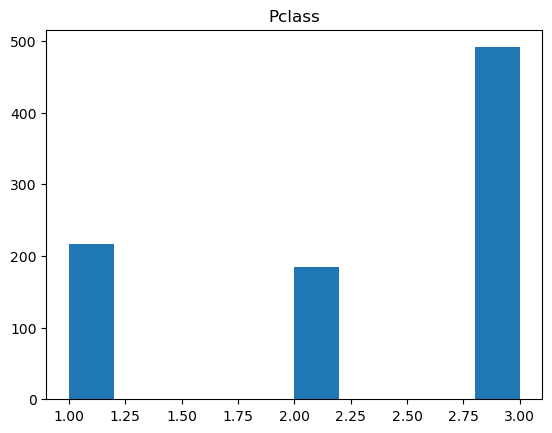

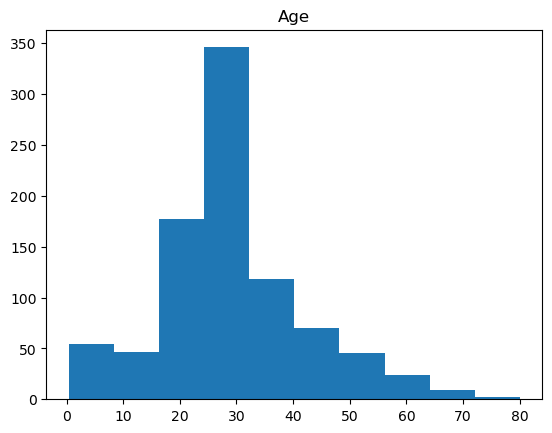

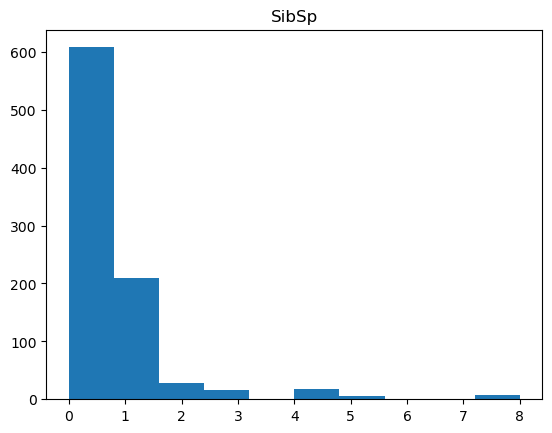

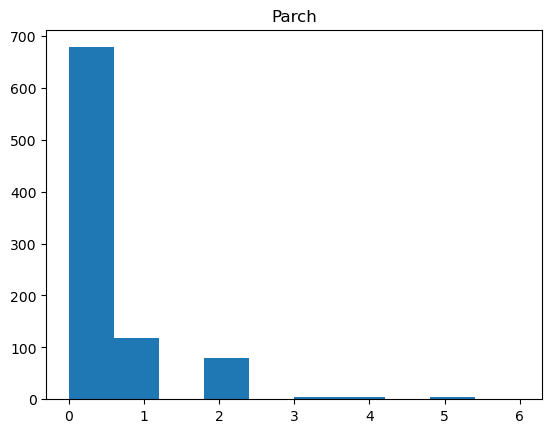

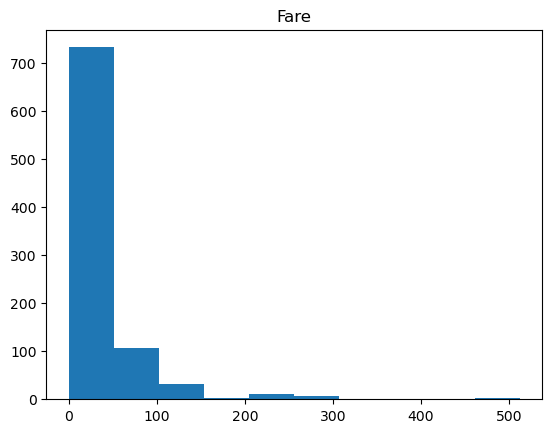

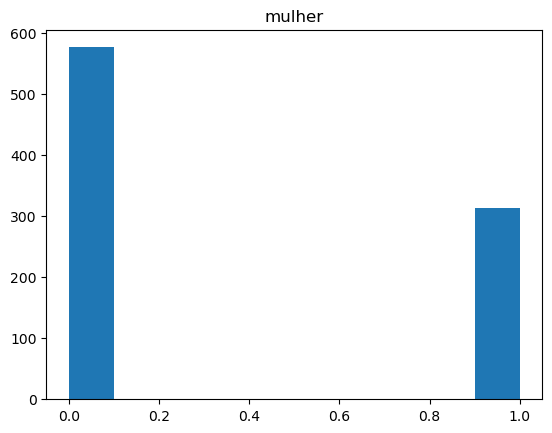

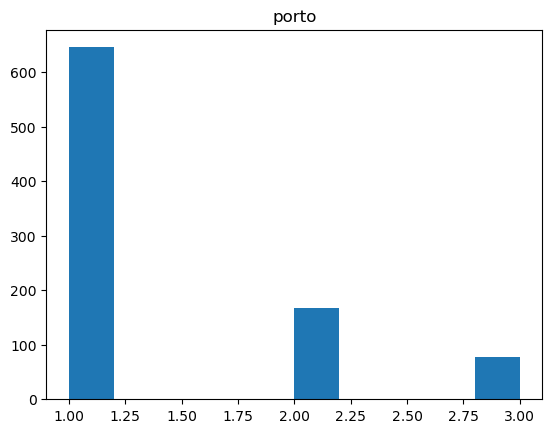

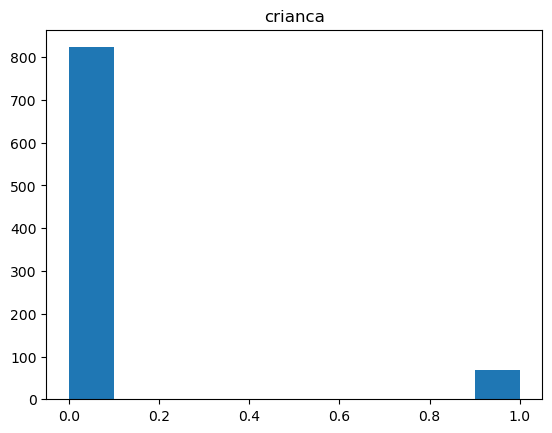

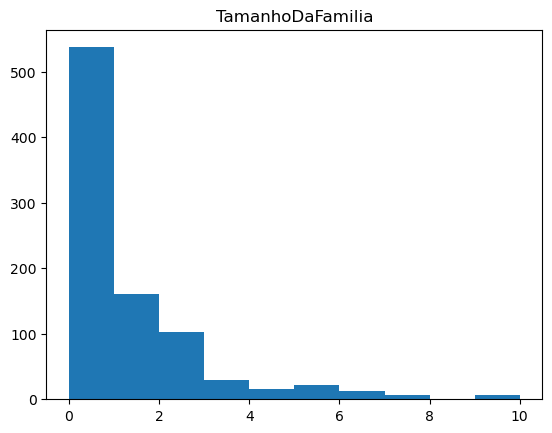

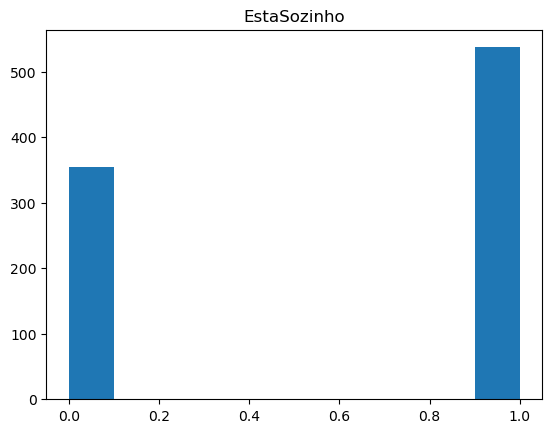

In [40]:
# Visualização dos dados
import matplotlib.pyplot as plt

for i in X_train.columns:
    plt.hist(X_train[i])
    plt.title(i)
    plt.show()


In [41]:
# group by 
# tive que utilizar o numeric_only=True

gp = train.groupby(['Survived']).mean(numeric_only=True)
gp

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


In [42]:
# pivot table para análise cruzada
table = pd.pivot_table(train,index=["Survived"],columns=["Embarked"],values="PassengerId",aggfunc = "count")
table

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [43]:
#Padronização das variáveis
scaler = StandardScaler() #media 0 e desviopadrao 1

X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)
X_train_sc,X_test_sc

(array([[ 0.82737724, -0.5924806 ,  0.43279337, ..., -0.28744485,
          0.05915988, -1.2316449 ],
        [-1.56610693,  0.63878901,  0.43279337, ..., -0.28744485,
          0.05915988, -1.2316449 ],
        [ 0.82737724, -0.2846632 , -0.4745452 , ..., -0.28744485,
         -0.56097483,  0.81192233],
        ...,
        [ 0.82737724,  0.        ,  0.43279337, ..., -0.28744485,
          1.29942929, -1.2316449 ],
        [-1.56610693, -0.2846632 , -0.4745452 , ..., -0.28744485,
         -0.56097483,  0.81192233],
        [ 0.82737724,  0.17706291, -0.4745452 , ..., -0.28744485,
         -0.56097483,  0.81192233]], shape=(891, 10)),
 array([[ 0.82737724,  0.36944878, -0.4745452 , ..., -0.28744485,
         -0.56097483,  0.81192233],
        [ 0.82737724,  1.33137817,  0.43279337, ..., -0.28744485,
          0.05915988, -1.2316449 ],
        [-0.36936484,  2.48569343, -0.4745452 , ..., -0.28744485,
         -0.56097483,  0.81192233],
        ...,
        [ 0.82737724,  0.67726619, -0

In [44]:
#modelo de validação
#Logistic Regression, # setando o max_iter
model_lr = LogisticRegression(random_state=0,max_iter=1000)
score = cross_val_score(model_lr,X_train_sc,y_train,cv=10)
print(score)
print(np.mean(score))

[0.8        0.78651685 0.76404494 0.84269663 0.80898876 0.7752809
 0.82022472 0.7752809  0.83146067 0.85393258]
0.8058426966292135


In [45]:
# modelo final
model_lr.fit(X_train_sc,y_train)
y_pred = model_lr.predict(X_train_sc)
y_pred

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,

In [46]:
# Matriz principal tem os resultados
mc = confusion_matrix(y_train,y_pred)
print(mc)

[[477  72]
 [ 97 245]]


## 3.1. Acurácia na base de treinamento

In [47]:
score = model_lr.score(X_train_sc,y_train)
score

0.8103254769921436

## 3.2. Predição sobre a base de teste
Fazendo a predição sobre a base de testes e exportando o arquivo para realizar a submissão através da plataforma Kaggle.

In [48]:
# Fazendo predição na base de testes
y_pred = model_lr.predict(X_test_sc)
y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [49]:
submission = pd.DataFrame(test["PassengerId"])

In [50]:
#salvando o arquivo para submissão no kaggle
submission["Survived"] = y_pred
submission.to_csv("dados/submission3.csv", index= False)

# 4. Implementar outros algoritmos

In [51]:
# separando dados de treinamento
X_train = train.drop(['PassengerId', 'Survived'], axis = 1)
X_test = test.drop(['PassengerId'], axis = 1)

In [52]:
X_train.info(), X_train["Embarked"].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Name      891 non-null    object 
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 69.7+ KB


(None,
 Embarked
 S    644
 C    168
 Q     77
 Name: count, dtype: int64)

In [53]:
# criar features e transformar em valores numéricos
def criar_feature(X):
    subs = {"female":1,"male":0}
    X["mulher"] = X["Sex"].replace(subs)
    X["Fare"] = X["Fare"].fillna(X["Fare"].mean())
    X["Age"] = X["Age"].fillna(X["Age"].mean())
    X["Embarked"]= X["Embarked"].fillna("S")
    subs = {"S":1,"C":2,"Q":3}
    X["porto"] = X["Embarked"].replace(subs)
    X['crianca'] = 1
    X['crianca'] = np.where(X['Age'] < 12,1,0)
    # Criar coluna de 'TamanhoDaFamilia'combinando SibSp e 'Parch'
    X['TamanhoDaFamilia'] = X['Parch'] + X['SibSp'] 
    # Criar coluna de viajando sozinho para identificar passageiros que estão viajando sozinhos
    X['EstaSozinho'] = np.where(X['TamanhoDaFamilia'] == 0, 1,0)
    
    return X

X_train = criar_feature(X_train)
X_test = criar_feature(X_test)

/tmp/ipykernel_18023/1599567601.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X["mulher"] = X["Sex"].replace(subs)
/tmp/ipykernel_18023/1599567601.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X["porto"] = X["Embarked"].replace(subs)
/tmp/ipykernel_18023/1599567601.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_sile

In [54]:
X_train.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'mulher', 'porto', 'crianca', 'TamanhoDaFamilia',
       'EstaSozinho'],
      dtype='object')

In [55]:
# selecionar as features que eu quero trabalhar no treino
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'mulher', 'porto', 'crianca', 
            'TamanhoDaFamilia', 'EstaSozinho']
X_train = X_train[features]
X_test = X_test[features]

y_train = train["Survived"]


In [56]:
#Padronização das variáveis
scaler = StandardScaler() #media 0 e desviopadrao 1

X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)
X_train_sc,X_test_sc

(array([[ 0.82737724, -0.5924806 ,  0.43279337, ..., -0.28744485,
          0.05915988, -1.2316449 ],
        [-1.56610693,  0.63878901,  0.43279337, ..., -0.28744485,
          0.05915988, -1.2316449 ],
        [ 0.82737724, -0.2846632 , -0.4745452 , ..., -0.28744485,
         -0.56097483,  0.81192233],
        ...,
        [ 0.82737724,  0.        ,  0.43279337, ..., -0.28744485,
          1.29942929, -1.2316449 ],
        [-1.56610693, -0.2846632 , -0.4745452 , ..., -0.28744485,
         -0.56097483,  0.81192233],
        [ 0.82737724,  0.17706291, -0.4745452 , ..., -0.28744485,
         -0.56097483,  0.81192233]], shape=(891, 10)),
 array([[ 0.82737724,  0.36944878, -0.4745452 , ..., -0.28744485,
         -0.56097483,  0.81192233],
        [ 0.82737724,  1.33137817,  0.43279337, ..., -0.28744485,
          0.05915988, -1.2316449 ],
        [-0.36936484,  2.48569343, -0.4745452 , ..., -0.28744485,
         -0.56097483,  0.81192233],
        ...,
        [ 0.82737724,  0.67726619, -0

In [57]:
#modelo de validação
#Logistic Regression, # setando o max_iter
model_lr = LogisticRegression(random_state=0,max_iter=1000)
score = cross_val_score(model_lr,X_train_sc,y_train,cv=10)
print(score)
print(np.mean(score))

[0.8        0.78651685 0.76404494 0.84269663 0.80898876 0.7752809
 0.82022472 0.7752809  0.83146067 0.85393258]
0.8058426966292135


In [58]:
# Naiva Bayes para Classificação
from sklearn.naive_bayes import GaussianNB

model_nb = GaussianNB()
score = cross_val_score(model_nb,X_train_sc,y_train,cv=10)
print(score)
print(np.mean(score))

[0.73333333 0.79775281 0.7752809  0.82022472 0.82022472 0.82022472
 0.82022472 0.80898876 0.82022472 0.84269663]
0.8059176029962547


In [59]:
# KNN para classificação
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=5, p=2)
score = cross_val_score(model_knn,X_train_sc,y_train,cv=10)
print(score)
print(np.mean(score))

[0.76666667 0.83146067 0.73033708 0.80898876 0.83146067 0.82022472
 0.85393258 0.79775281 0.85393258 0.7752809 ]
0.8070037453183521


In [60]:
# SVM  para classificação
from sklearn.svm import SVC

model_svc = SVC(C=3,kernel = 'rbf', degree = 2, gamma = 0.1)
score = cross_val_score(model_svc,X_train_sc,y_train,cv=10)
print(score)
print(np.mean(score))


[0.84444444 0.84269663 0.75280899 0.86516854 0.85393258 0.79775281
 0.80898876 0.7752809  0.86516854 0.82022472]
0.8226466916354557


In [61]:
# Decision Tree
# com 3 eles não decora as features e generaliza melhor sobre a base de testes
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(criterion='entropy', max_depth=3,min_samples_split=2, 
                                  min_samples_leaf=1, random_state=0)
score = cross_val_score(model_dt,X_train_sc,y_train,cv=10)
print(score)
print(np.mean(score))

[0.82222222 0.84269663 0.7752809  0.86516854 0.83146067 0.78651685
 0.78651685 0.78651685 0.85393258 0.83146067]
0.8181772784019975


In [62]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=100, 
                                  min_samples_split=2, 
                                  min_samples_leaf=1, random_state=0)
score = cross_val_score(model_rf,X_train_sc,y_train,cv=10)
print(score)
print(np.mean(score))


[0.81111111 0.83146067 0.76404494 0.8988764  0.87640449 0.79775281
 0.82022472 0.76404494 0.86516854 0.84269663]
0.8271785268414481


In [63]:
# modelo final
model_rf.fit(X_train_sc,y_train)
y_pred = model_rf.predict(X_train_sc)
#y_pred

In [64]:
# Matriz principal tem os resultados
mc = confusion_matrix(y_train,y_pred)
print(mc)

[[513  36]
 [ 96 246]]


## 4.1. Acurácia na base de treinamento

In [65]:
score = model_rf.score(X_train_sc,y_train)
score

0.8518518518518519

## 4.2. Predição sobre a base de teste
Fazendo a predição sobre a base de testes e exportando o arquivo para realizar a submissão através da plataforma Kaggle.

In [66]:
# Fazendo predição na base de testes
y_pred = model_rf.predict(X_test_sc)
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [67]:
submission = pd.DataFrame(test["PassengerId"])

In [68]:
#salvando o arquivo para submissão no kaggle
submission["Survived"] = y_pred
submission.to_csv("dados/submission4.csv", index= False)

# 5. Otimizando Hiperparâmetros

In [69]:
# separando dados de treinamento
X_train = train.drop(['PassengerId', 'Survived'], axis = 1)
X_test = test.drop(['PassengerId'], axis = 1)

In [70]:
X_train.info(), X_train["Embarked"].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Name      891 non-null    object 
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 69.7+ KB


(None,
 Embarked
 S    644
 C    168
 Q     77
 Name: count, dtype: int64)

In [71]:
# criar features e transformar em valores numéricos
def criar_feature(X):
    subs = {"female":1,"male":0}
    X["mulher"] = X["Sex"].replace(subs)
    X["Fare"] = X["Fare"].fillna(X["Fare"].mean())
    X["Age"] = X["Age"].fillna(X["Age"].mean())
    X["Embarked"]= X["Embarked"].fillna("S")
    subs = {"S":1,"C":2,"Q":3}
    X["porto"] = X["Embarked"].replace(subs)
    X['crianca'] = 1
    X['crianca'] = np.where(X['Age'] < 12,1,0)
    # Criar coluna de 'TamanhoDaFamilia'combinando SibSp e 'Parch'
    X['TamanhoDaFamilia'] = X['Parch'] + X['SibSp'] 
    # Criar coluna de viajando sozinho para identificar passageiros que estão viajando sozinhos
    X['EstaSozinho'] = np.where(X['TamanhoDaFamilia'] == 0, 1,0)
    
    return X

X_train = criar_feature(X_train)
X_test = criar_feature(X_test)

/tmp/ipykernel_18023/1599567601.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X["mulher"] = X["Sex"].replace(subs)
/tmp/ipykernel_18023/1599567601.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X["porto"] = X["Embarked"].replace(subs)
/tmp/ipykernel_18023/1599567601.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_sile

In [72]:
X_train.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'mulher', 'porto', 'crianca', 'TamanhoDaFamilia',
       'EstaSozinho'],
      dtype='object')

In [73]:
# selecionar as features que eu quero trabalhar no treino
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'mulher', 'porto', 'crianca', 
            'TamanhoDaFamilia', 'EstaSozinho']
X_train = X_train[features]
X_test = X_test[features]

y_train = train["Survived"]


In [74]:
#Padronização das variáveis
scaler = StandardScaler() #media 0 e desviopadrao 1

X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)
X_train_sc,X_test_sc

(array([[ 0.82737724, -0.5924806 ,  0.43279337, ..., -0.28744485,
          0.05915988, -1.2316449 ],
        [-1.56610693,  0.63878901,  0.43279337, ..., -0.28744485,
          0.05915988, -1.2316449 ],
        [ 0.82737724, -0.2846632 , -0.4745452 , ..., -0.28744485,
         -0.56097483,  0.81192233],
        ...,
        [ 0.82737724,  0.        ,  0.43279337, ..., -0.28744485,
          1.29942929, -1.2316449 ],
        [-1.56610693, -0.2846632 , -0.4745452 , ..., -0.28744485,
         -0.56097483,  0.81192233],
        [ 0.82737724,  0.17706291, -0.4745452 , ..., -0.28744485,
         -0.56097483,  0.81192233]], shape=(891, 10)),
 array([[ 0.82737724,  0.36944878, -0.4745452 , ..., -0.28744485,
         -0.56097483,  0.81192233],
        [ 0.82737724,  1.33137817,  0.43279337, ..., -0.28744485,
          0.05915988, -1.2316449 ],
        [-0.36936484,  2.48569343, -0.4745452 , ..., -0.28744485,
         -0.56097483,  0.81192233],
        ...,
        [ 0.82737724,  0.67726619, -0

In [75]:
#modelo de validação
#Logistic Regression, # setando o max_iter
model_lr = LogisticRegression(random_state=0,max_iter=1000)
score = cross_val_score(model_lr,X_train_sc,y_train,cv=10)
print(score)
print(np.mean(score))

[0.8        0.78651685 0.76404494 0.84269663 0.80898876 0.7752809
 0.82022472 0.7752809  0.83146067 0.85393258]
0.8058426966292135


In [76]:
# Naiva Bayes para Classificação
from sklearn.naive_bayes import GaussianNB

model_nb = GaussianNB()
score = cross_val_score(model_nb,X_train_sc,y_train,cv=10)
print(score)
print(np.mean(score))

[0.73333333 0.79775281 0.7752809  0.82022472 0.82022472 0.82022472
 0.82022472 0.80898876 0.82022472 0.84269663]
0.8059176029962547


In [77]:
# KNN para classificação
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=5, p=2)
score = cross_val_score(model_knn,X_train_sc,y_train,cv=10)
print(score)
print(np.mean(score))

[0.76666667 0.83146067 0.73033708 0.80898876 0.83146067 0.82022472
 0.85393258 0.79775281 0.85393258 0.7752809 ]
0.8070037453183521


In [78]:
# SVM  para classificação
from sklearn.svm import SVC

model_svc = SVC(C=3,kernel = 'rbf', degree = 2, gamma = 0.1)
score = cross_val_score(model_svc,X_train_sc,y_train,cv=10)
print(score)
print(np.mean(score))


[0.84444444 0.84269663 0.75280899 0.86516854 0.85393258 0.79775281
 0.80898876 0.7752809  0.86516854 0.82022472]
0.8226466916354557


In [79]:
# Decision Tree
# com 3 eles não decora as features e generaliza melhor sobre a base de testes
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(criterion='entropy', max_depth=3,min_samples_split=2, 
                                  min_samples_leaf=1, random_state=0)
score = cross_val_score(model_dt,X_train_sc,y_train,cv=10)
print(score)
print(np.mean(score))

[0.82222222 0.84269663 0.7752809  0.86516854 0.83146067 0.78651685
 0.78651685 0.78651685 0.85393258 0.83146067]
0.8181772784019975


In [80]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=100, 
                                  min_samples_split=2, 
                                  min_samples_leaf=1, random_state=0)
score = cross_val_score(model_rf,X_train_sc,y_train,cv=10)
print(score)
print(np.mean(score))


[0.81111111 0.83146067 0.76404494 0.8988764  0.87640449 0.79775281
 0.82022472 0.76404494 0.86516854 0.84269663]
0.8271785268414481


In [81]:
#otimização de hiperparametros 
from skopt import gp_minimize

def treinar_modelo(parametros):
    model_rf = RandomForestClassifier(criterion=parametros[0], 
                                      n_estimators=parametros[1], 
                                      max_depth=parametros[2], 
                                      min_samples_split=parametros[3], 
                                      min_samples_leaf=parametros[4], 
                                      random_state=0, n_jobs=-1)
    score = cross_val_score(model_rf,X_train_sc,y_train,cv=10)
    meanscore = np.mean(score)
    print(np.mean(score))
    #quanto maior melhor
    return -meanscore
    
#tuplas com os parametros
parametros = [('entropy', 'gini'),#criterion
              (100, 1000), # n_estimators
              (3,20), #max_depth
              (2,10), # min_samples_split
              (1,10)] # min_samples_leaf
otimos = gp_minimize(treinar_modelo, parametros, random_state=0, verbose=1,n_calls=30, 
                     n_random_starts=10);

Iteration No: 1 started. Evaluating function at random point.
0.8249812734082397
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 21.2365
Function value obtained: -0.8250
Current minimum: -0.8250
Iteration No: 2 started. Evaluating function at random point.
0.8316604244694131
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 9.1183
Function value obtained: -0.8317
Current minimum: -0.8317
Iteration No: 3 started. Evaluating function at random point.
0.8283770287141072
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 13.2281
Function value obtained: -0.8284
Current minimum: -0.8317
Iteration No: 4 started. Evaluating function at random point.
0.829450686641698
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 10.7764
Function value obtained: -0.8295
Current minimum: -0.8317
Iteration No: 5 started. Evaluating function at random point.
0.8294756554307116
Iteration No: 5 ended. Evaluation done at random point.
Time 

In [82]:
# imprimindo o melhor resultado
otimos.fun, otimos.x

(np.float64(-0.8316604244694131),
 ['entropy', np.int64(368), np.int64(4), np.int64(4), np.int64(5)])

In [83]:
# treinando modelo final  com os melhores parametros
model_rf = RandomForestClassifier(criterion=otimos.x[0], 
                                      n_estimators=otimos.x[1], 
                                      max_depth=otimos.x[2], 
                                      min_samples_split=otimos.x[3], 
                                      min_samples_leaf=otimos.x[4], 
                                      random_state=0, n_jobs=-1)

model_rf.fit(X_train_sc,y_train)
y_pred = model_rf.predict(X_train_sc)
#y_pred

In [84]:
# Matriz principal tem os resultados
mc = confusion_matrix(y_train,y_pred)
print(mc)

[[512  37]
 [105 237]]


## 5.1. Acurácia na base de treinamento

In [85]:
score = model_rf.score(X_train_sc,y_train)
score

0.8406285072951739

## 5.2. Predição sobre a base de teste
Fazendo a predição sobre a base de testes e exportando o arquivo para realizar a submissão através da plataforma Kaggle.

In [86]:
# Fazendo predição na base de testes
y_pred = model_rf.predict(X_test_sc)
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [87]:
submission = pd.DataFrame(test["PassengerId"])

In [88]:
#salvando o arquivo para submissão no kaggle
submission["Survived"] = y_pred
submission.to_csv("dados/submission5.csv", index= False)

# 6. Combinando Modelos para gerar um modelo final

In [89]:
# separando dados de treinamento
X_train = train.drop(['PassengerId', 'Survived'], axis = 1)
X_test = test.drop(['PassengerId'], axis = 1)

In [90]:
X_train.info(), X_train["Embarked"].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Name      891 non-null    object 
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 69.7+ KB


(None,
 Embarked
 S    644
 C    168
 Q     77
 Name: count, dtype: int64)

In [91]:
# criar features e transformar em valores numéricos
def criar_feature(X):
    subs = {"female":1,"male":0}
    X["mulher"] = X["Sex"].replace(subs)
    X["Fare"] = X["Fare"].fillna(X["Fare"].mean())
    X["Age"] = X["Age"].fillna(X["Age"].mean())
    X["Embarked"]= X["Embarked"].fillna("S")
    subs = {"S":1,"C":2,"Q":3}
    X["porto"] = X["Embarked"].replace(subs)
    X['crianca'] = 1
    X['crianca'] = np.where(X['Age'] < 12,1,0)
    # Criar coluna de 'TamanhoDaFamilia'combinando SibSp e 'Parch'
    X['TamanhoDaFamilia'] = X['Parch'] + X['SibSp'] 
    # Criar coluna de viajando sozinho para identificar passageiros que estão viajando sozinhos
    X['EstaSozinho'] = np.where(X['TamanhoDaFamilia'] == 0, 1,0)
    
    return X

X_train = criar_feature(X_train)
X_test = criar_feature(X_test)

/tmp/ipykernel_18023/1599567601.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X["mulher"] = X["Sex"].replace(subs)
/tmp/ipykernel_18023/1599567601.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X["porto"] = X["Embarked"].replace(subs)
/tmp/ipykernel_18023/1599567601.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_sile

In [92]:
X_train.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'mulher', 'porto', 'crianca', 'TamanhoDaFamilia',
       'EstaSozinho'],
      dtype='object')

In [93]:
# selecionar as features que eu quero trabalhar no treino
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'mulher', 'porto', 'crianca', 
            'TamanhoDaFamilia', 'EstaSozinho']
X_train = X_train[features]
X_test = X_test[features]

y_train = train["Survived"]


In [94]:
#Padronização das variáveis
scaler = StandardScaler() #media 0 e desviopadrao 1

X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)
X_train_sc,X_test_sc

(array([[ 0.82737724, -0.5924806 ,  0.43279337, ..., -0.28744485,
          0.05915988, -1.2316449 ],
        [-1.56610693,  0.63878901,  0.43279337, ..., -0.28744485,
          0.05915988, -1.2316449 ],
        [ 0.82737724, -0.2846632 , -0.4745452 , ..., -0.28744485,
         -0.56097483,  0.81192233],
        ...,
        [ 0.82737724,  0.        ,  0.43279337, ..., -0.28744485,
          1.29942929, -1.2316449 ],
        [-1.56610693, -0.2846632 , -0.4745452 , ..., -0.28744485,
         -0.56097483,  0.81192233],
        [ 0.82737724,  0.17706291, -0.4745452 , ..., -0.28744485,
         -0.56097483,  0.81192233]], shape=(891, 10)),
 array([[ 0.82737724,  0.36944878, -0.4745452 , ..., -0.28744485,
         -0.56097483,  0.81192233],
        [ 0.82737724,  1.33137817,  0.43279337, ..., -0.28744485,
          0.05915988, -1.2316449 ],
        [-0.36936484,  2.48569343, -0.4745452 , ..., -0.28744485,
         -0.56097483,  0.81192233],
        ...,
        [ 0.82737724,  0.67726619, -0

In [95]:
#modelo de validação
#Logistic Regression, # setando o max_iter
model_lr = LogisticRegression(random_state=0,max_iter=1000)
score = cross_val_score(model_lr,X_train_sc,y_train,cv=10)
print(score)
print(np.mean(score))

[0.8        0.78651685 0.76404494 0.84269663 0.80898876 0.7752809
 0.82022472 0.7752809  0.83146067 0.85393258]
0.8058426966292135


In [96]:
# Naiva Bayes para Classificação
from sklearn.naive_bayes import GaussianNB

model_nb = GaussianNB()
score = cross_val_score(model_nb,X_train_sc,y_train,cv=10)
print(score)
print(np.mean(score))

[0.73333333 0.79775281 0.7752809  0.82022472 0.82022472 0.82022472
 0.82022472 0.80898876 0.82022472 0.84269663]
0.8059176029962547


In [97]:
# KNN para classificação
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=5, p=2)
score = cross_val_score(model_knn,X_train_sc,y_train,cv=10)
print(score)
print(np.mean(score))

[0.76666667 0.83146067 0.73033708 0.80898876 0.83146067 0.82022472
 0.85393258 0.79775281 0.85393258 0.7752809 ]
0.8070037453183521


In [98]:
# SVM  para classificação
from sklearn.svm import SVC

model_svc = SVC(C=3,kernel = 'rbf', degree = 2, gamma = 0.1)
score = cross_val_score(model_svc,X_train_sc,y_train,cv=10)
print(score)
print(np.mean(score))


[0.84444444 0.84269663 0.75280899 0.86516854 0.85393258 0.79775281
 0.80898876 0.7752809  0.86516854 0.82022472]
0.8226466916354557


In [99]:
# Decision Tree
# com 3 eles não decora as features e generaliza melhor sobre a base de testes
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(criterion='entropy', max_depth=3,min_samples_split=2, 
                                  min_samples_leaf=1, random_state=0)
score = cross_val_score(model_dt,X_train_sc,y_train,cv=10)
print(score)
print(np.mean(score))

[0.82222222 0.84269663 0.7752809  0.86516854 0.83146067 0.78651685
 0.78651685 0.78651685 0.85393258 0.83146067]
0.8181772784019975


In [100]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=100, 
                                  min_samples_split=2, 
                                  min_samples_leaf=1, random_state=0)
score = cross_val_score(model_rf,X_train_sc,y_train,cv=10)
print(score)
print(np.mean(score))


[0.81111111 0.83146067 0.76404494 0.8988764  0.87640449 0.79775281
 0.82022472 0.76404494 0.86516854 0.84269663]
0.8271785268414481


In [101]:
#otimização de hiperparametros 
from skopt import gp_minimize

def treinar_modelo(parametros):
    model_rf = RandomForestClassifier(criterion=parametros[0], 
                                      n_estimators=parametros[1], 
                                      max_depth=parametros[2], 
                                      min_samples_split=parametros[3], 
                                      min_samples_leaf=parametros[4], 
                                      random_state=0, n_jobs=-1)
    score = cross_val_score(model_rf,X_train_sc,y_train,cv=10)
    meanscore = np.mean(score)
    print(np.mean(score))
    #quanto maior melhor
    return -meanscore
    
#tuplas com os parametros
parametros = [('entropy', 'gini'),#criterion
              (100, 1000), # n_estimators
              (3,20), #max_depth
              (2,10), # min_samples_split
              (1,10)] # min_samples_leaf
otimos = gp_minimize(treinar_modelo, parametros, random_state=0, verbose=1,n_calls=30, 
                     n_random_starts=10);

Iteration No: 1 started. Evaluating function at random point.
0.8249812734082397
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 23.9848
Function value obtained: -0.8250
Current minimum: -0.8250
Iteration No: 2 started. Evaluating function at random point.
0.8316604244694131
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 10.1555
Function value obtained: -0.8317
Current minimum: -0.8317
Iteration No: 3 started. Evaluating function at random point.
0.8283770287141072
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 16.5247
Function value obtained: -0.8284
Current minimum: -0.8317
Iteration No: 4 started. Evaluating function at random point.
0.829450686641698
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 12.1965
Function value obtained: -0.8295
Current minimum: -0.8317
Iteration No: 5 started. Evaluating function at random point.
0.8294756554307116
Iteration No: 5 ended. Evaluation done at random point.
Time

In [102]:
# imprimindo o melhor resultado
otimos.fun, otimos.x

(np.float64(-0.8316604244694131),
 ['entropy', np.int64(368), np.int64(4), np.int64(4), np.int64(5)])

In [103]:
# treinando modelo final  com os melhores parametros
model_rf = RandomForestClassifier(criterion=otimos.x[0], 
                                      n_estimators=otimos.x[1], 
                                      max_depth=otimos.x[2], 
                                      min_samples_split=otimos.x[3], 
                                      min_samples_leaf=otimos.x[4], 
                                      random_state=0, n_jobs=-1)

model_rf.fit(X_train_sc,y_train)
y_pred = model_rf.predict(X_train_sc)
#y_pred

In [104]:
#Ensamble model (voting)
from sklearn.ensemble import VotingClassifier

# hard utiliza a saida enquanto soft utiliza as probabilidades.
model_voting = VotingClassifier(estimators = [('LR', model_lr),
                                              ('KNN', model_knn),
                                              ('SVC',model_svc),
                                              ('RF',model_rf)],voting='hard')

model_voting.fit(X_train_sc, y_train)

score = cross_val_score(model_voting, X_train_sc, y_train, cv = 10)

print(np.mean(score))


0.8249063670411985


In [105]:
# Matriz principal tem os resultados
mc = confusion_matrix(y_train,y_pred)
print(mc)

[[512  37]
 [105 237]]


## 6.1. Acurácia na base de treinamento

In [106]:
score = model_voting.score(X_train_sc,y_train)
score

0.8428731762065096

## 6.2. Predição sobre a base de teste
Fazendo a predição sobre a base de testes e exportando o arquivo para realizar a submissão através da plataforma Kaggle.

In [107]:
# Fazendo predição na base de testes
y_pred = model_voting.predict(X_test_sc)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [108]:
submission = pd.DataFrame(test["PassengerId"])

In [109]:
#salvando o arquivo para submissão no kaggle
submission["Survived"] = y_pred
submission.to_csv("dados/submission6.csv", index= False)

# 7. Otimizando outros modelos

In [155]:
# separando dados de treinamento
X_train = train.drop(['PassengerId', 'Survived'], axis = 1)
X_test = test.drop(['PassengerId'], axis = 1)

In [156]:
X_train.info(), X_train["Embarked"].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Name      891 non-null    object 
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 69.7+ KB


(None,
 Embarked
 S    644
 C    168
 Q     77
 Name: count, dtype: int64)

In [157]:
#Testando a cabine
train["Cabin"].isnull(), train["Cabin"]

(0       True
 1      False
 2       True
 3      False
 4       True
        ...  
 886     True
 887    False
 888     True
 889    False
 890     True
 Name: Cabin, Length: 891, dtype: bool,
 0       NaN
 1       C85
 2       NaN
 3      C123
 4       NaN
        ... 
 886     NaN
 887     B42
 888     NaN
 889    C148
 890     NaN
 Name: Cabin, Length: 891, dtype: object)

In [158]:
# criar features e transformar em valores numéricos
def criar_feature(X):
    subs = {"female":1,"male":0}
    X["mulher"] = X["Sex"].replace(subs)
    X["Fare"] = X["Fare"].fillna(X["Fare"].mean())
    X["Age"] = X["Age"].fillna(X["Age"].mean())
    X["Embarked"]= X["Embarked"].fillna("S")
    subs = {"S":1,"C":2,"Q":3}
    X["porto"] = X["Embarked"].replace(subs)
    X['crianca'] = 1
    X['crianca'] = np.where(X['Age'] < 12,1,0)
    # Criar coluna de 'TamanhoDaFamilia'combinando SibSp e 'Parch'
    X['TamanhoDaFamilia'] = X['Parch'] + X['SibSp'] 
    # Criar coluna de viajando sozinho para identificar passageiros que estão viajando sozinhos
    X['EstaSozinho'] = np.where(X['TamanhoDaFamilia'] == 0, 1,0)
    X['Cabine'] = np.where(X["Cabin"].isnull(),0,1)
    
    return X

X_train = criar_feature(X_train)
X_test = criar_feature(X_test)

/tmp/ipykernel_18023/2982473549.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X["mulher"] = X["Sex"].replace(subs)
/tmp/ipykernel_18023/2982473549.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X["porto"] = X["Embarked"].replace(subs)
/tmp/ipykernel_18023/2982473549.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_sile

In [159]:
X_train.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'mulher', 'porto', 'crianca', 'TamanhoDaFamilia',
       'EstaSozinho', 'Cabine'],
      dtype='object')

In [160]:
# selecionar as features que eu quero trabalhar no treino
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'mulher', 'porto', 'crianca', 
            'TamanhoDaFamilia', 'EstaSozinho', 'Cabine']
X_train = X_train[features]
X_test = X_test[features]

y_train = train["Survived"]


In [161]:
#Padronização das variáveis
scaler = StandardScaler() #media 0 e desviopadrao 1

X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)
X_train_sc,X_test_sc

(array([[ 0.82737724, -0.5924806 ,  0.43279337, ...,  0.05915988,
         -1.2316449 , -0.54492498],
        [-1.56610693,  0.63878901,  0.43279337, ...,  0.05915988,
         -1.2316449 ,  1.835115  ],
        [ 0.82737724, -0.2846632 , -0.4745452 , ..., -0.56097483,
          0.81192233, -0.54492498],
        ...,
        [ 0.82737724,  0.        ,  0.43279337, ...,  1.29942929,
         -1.2316449 , -0.54492498],
        [-1.56610693, -0.2846632 , -0.4745452 , ..., -0.56097483,
          0.81192233,  1.835115  ],
        [ 0.82737724,  0.17706291, -0.4745452 , ..., -0.56097483,
          0.81192233, -0.54492498]], shape=(891, 11)),
 array([[ 0.82737724,  0.36944878, -0.4745452 , ..., -0.56097483,
          0.81192233, -0.54492498],
        [ 0.82737724,  1.33137817,  0.43279337, ...,  0.05915988,
         -1.2316449 , -0.54492498],
        [-0.36936484,  2.48569343, -0.4745452 , ..., -0.56097483,
          0.81192233, -0.54492498],
        ...,
        [ 0.82737724,  0.67726619, -0

In [162]:
#modelo de validação
#Logistic Regression, # setando o max_iter
model_lr = LogisticRegression(random_state=0,max_iter=1000)
score = cross_val_score(model_lr,X_train_sc,y_train,cv=10)
print(score)
print(np.mean(score))

[0.8        0.80898876 0.76404494 0.83146067 0.80898876 0.7752809
 0.83146067 0.79775281 0.84269663 0.87640449]
0.8137078651685394


In [163]:
# KNN para classificação
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=5, p=2)
score = cross_val_score(model_knn,X_train_sc,y_train,cv=10)
print(score)
print(np.mean(score))

[0.81111111 0.79775281 0.74157303 0.78651685 0.84269663 0.80898876
 0.83146067 0.80898876 0.84269663 0.80898876]
0.8080774032459426


In [164]:
# SVM  para classificação
from sklearn.svm import SVC

model_svc = SVC(C=3,kernel = 'rbf', degree = 2, gamma = 0.1)
score = cross_val_score(model_svc,X_train_sc,y_train,cv=10)
print(score)
print(np.mean(score))


[0.83333333 0.83146067 0.75280899 0.86516854 0.87640449 0.79775281
 0.82022472 0.7752809  0.86516854 0.85393258]
0.8271535580524343


In [165]:
#otimização de hiperparametros 
from skopt import gp_minimize

def treinar_modelosvc(parametros):
    model_svc = SVC(C=parametros[0],kernel = parametros[1], degree = parametros[2], gamma = parametros[3])
    score = cross_val_score(model_svc,X_train_sc,y_train,cv=10)
    meanscore = np.mean(score)
    print(np.mean(score))
    #quanto maior melhor
    return -meanscore
    
#tuplas com os parametros
parametros = [(1.0,3.0),
              ('sigmoid', 'poly', 'rbf'), 
              (1,5), 
              (0.01,0.1)] 
otimos3 = gp_minimize(treinar_modelosvc, parametros, random_state=0, verbose=1,n_calls=50, 
                     n_random_starts=10);

Iteration No: 1 started. Evaluating function at random point.
0.8226841448189763
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.3117
Function value obtained: -0.8227
Current minimum: -0.8227
Iteration No: 2 started. Evaluating function at random point.
0.7161048689138576
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.2720
Function value obtained: -0.7161
Current minimum: -0.8227
Iteration No: 3 started. Evaluating function at random point.
0.755330836454432
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.2879
Function value obtained: -0.7553
Current minimum: -0.8227
Iteration No: 4 started. Evaluating function at random point.
0.8215730337078652
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 0.2824
Function value obtained: -0.8216
Current minimum: -0.8227
Iteration No: 5 started. Evaluating function at random point.
0.8204119850187265
Iteration No: 5 ended. Evaluation done at random point.
Time tak

In [166]:
otimos3.fun, otimos3.x

(np.float64(-0.8316604244694131),
 [3.0, np.str_('rbf'), np.int64(3), 0.03078876893992194])

In [167]:
# treinando modelo final  com os melhores parametros
model_svc = SVC(C=otimos3.x[0],kernel = otimos3.x[1], degree = otimos3.x[2], gamma = otimos3.x[3])
model_svc.fit(X_train_sc,y_train)
#y_pred = model_svc.predict(X_train_sc)
score = model_svc.score(X_train_sc,y_train)
score

0.8316498316498316

In [168]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=100, 
                                  min_samples_split=2, 
                                  min_samples_leaf=1, random_state=0)
score = cross_val_score(model_rf,X_train_sc,y_train,cv=10)
print(score)
print(np.mean(score))


[0.78888889 0.80898876 0.7752809  0.88764045 0.87640449 0.80898876
 0.82022472 0.76404494 0.86516854 0.86516854]
0.826079900124844


In [169]:
#otimização de hiperparametros 
from skopt import gp_minimize

def treinar_modelo(parametros):
    model_rf = RandomForestClassifier(criterion=parametros[0], 
                                      n_estimators=parametros[1], 
                                      max_depth=parametros[2], 
                                      min_samples_split=parametros[3], 
                                      min_samples_leaf=parametros[4], 
                                      random_state=0, n_jobs=-1)
    score = cross_val_score(model_rf,X_train_sc,y_train,cv=10)
    meanscore = np.mean(score)
    print(np.mean(score))
    #quanto maior melhor
    return -meanscore
    
#tuplas com os parametros
parametros = [('entropy', 'gini'),#criterion
              (100, 1000), # n_estimators
              (3,20), #max_depth
              (2,10), # min_samples_split
              (1,10)] # min_samples_leaf
otimos = gp_minimize(treinar_modelo, parametros, random_state=0, verbose=1,n_calls=30, 
                     n_random_starts=10);

Iteration No: 1 started. Evaluating function at random point.
0.8193508114856429
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 22.4262
Function value obtained: -0.8194
Current minimum: -0.8194
Iteration No: 2 started. Evaluating function at random point.
0.8170786516853932
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 9.3365
Function value obtained: -0.8171
Current minimum: -0.8194
Iteration No: 3 started. Evaluating function at random point.
0.8160049937578029
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 13.4666
Function value obtained: -0.8160
Current minimum: -0.8194
Iteration No: 4 started. Evaluating function at random point.
0.8159800249687891
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 11.2135
Function value obtained: -0.8160
Current minimum: -0.8194
Iteration No: 5 started. Evaluating function at random point.
0.8238451935081148
Iteration No: 5 ended. Evaluation done at random point.
Time

In [170]:
# imprimindo o melhor resultado
otimos.fun, otimos.x

(np.float64(-0.8272159800249688),
 [np.str_('entropy'), np.int64(771), np.int64(14), np.int64(5), np.int64(2)])

In [171]:
# treinando modelo final  com os melhores parametros
model_rf = RandomForestClassifier(criterion=otimos.x[0], 
                                      n_estimators=otimos.x[1], 
                                      max_depth=otimos.x[2], 
                                      min_samples_split=otimos.x[3], 
                                      min_samples_leaf=otimos.x[4], 
                                      random_state=0, n_jobs=-1)

model_rf.fit(X_train_sc,y_train)
y_pred = model_rf.predict(X_train_sc)
#y_pred

In [172]:
#Ensamble model (voting)
from sklearn.ensemble import VotingClassifier

# hard utiliza a saida enquanto soft utiliza as probabilidades.
model_voting = VotingClassifier(estimators = [('LR', model_lr),
                                              ('KNN', model_knn),
                                              ('SVC',model_svc),
                                              ('RF',model_rf)],voting='hard')

model_voting.fit(X_train_sc, y_train)

score = cross_val_score(model_voting, X_train_sc, y_train, cv = 10)

print(np.mean(score))


0.8272034956304619


In [173]:
# Matriz principal tem os resultados
mc = confusion_matrix(y_train,y_pred)
print(mc)

[[531  18]
 [ 56 286]]


## 7.1. Acurácia na base de treinamento

In [174]:
score = model_voting.score(X_train_sc,y_train)
score

0.8641975308641975

## 7.2. Predição sobre a base de teste
Fazendo a predição sobre a base de testes e exportando o arquivo para realizar a submissão através da plataforma Kaggle.

In [175]:
# Fazendo predição na base de testes
y_pred = model_voting.predict(X_test_sc)
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [177]:
submission = pd.DataFrame(test["PassengerId"])

In [178]:
#salvando o arquivo para submissão no kaggle
submission["Survived"] = y_pred
submission.to_csv("dados/submission9.csv", index= False)